In [23]:
import scipy.special
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [14]:
def paths(n):
    total = 0
    k = 0
    while k <= n-1-k:
        total += (2 ** k) * scipy.special.comb(n-1-k, k, exact = True)
        k += 1
    return total

In [16]:
for i in range(2,7):
    print(paths(i))

1
3
5
11
21


In [18]:
paths(25) / (2 ** 24)

0.6666666865348816

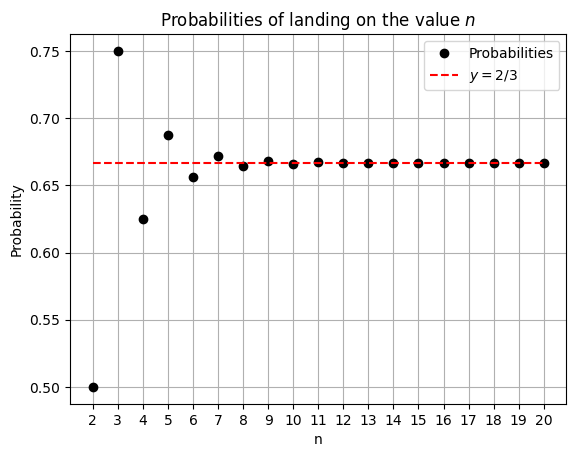

In [73]:
def prob_paths(n):
    return paths(n) / (2 ** (n-1))

x = [n for n in range(2,21)]
y = [prob_paths(n) for n in range(2,21)]

plt.plot(x,y,'ko' ,label = 'Probabilities')
plt.plot(x, [2/3 for n in range(2,21)], 'r--', label = '$y = 2/3$')
plt.title('Probabilities of landing on the value $n$')
plt.legend()
plt.xlabel('n')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid()
plt.show()

In [47]:
A,B = 1/2, 1/2
a, b = (A**2 + B), (A*B)
#a, b = (a*A + b), a*B
print(a,b)

0.75 0.25


In [214]:
A = 0.5
B = 1-A
a, b = (A**2 + B), (A*B)

for i in range(21):
    a, b = (a*A + b), a*B
print(f'The cefficients a and b are (a,b) = {(a,b)}')
print(f'The probability of landing on 25 using the iterative method is {a*A + b}')
print(f'The probability of landing on 25 using the sum formula is {prob_paths(25)}')

The cefficients a and b are (a,b) = (0.6666666269302368, 0.3333333730697632)
The probability of landing on 25 using the iterative method is 0.6666666865348816
The probability of landing on 25 using the sum formula is 0.6666666865348816


In [215]:
def it(x): #cheking the iterative method using the map T
    return 1 - x/2

x = 0.5
for i in range(23):
    x = it(x)
print(x)

0.6666666865348816


## biased coin ##

In [216]:
A = 0.25
B = 1-A
a, b = (A**2 + B), (A*B)
#a, b = (a*A + b), a*B
#print(a,b)

a, b = (A**2 + B), (A*B)

for i in range(1):
    a, b = (a*A + b), a*B
#print(a,b)
print(A*a+(1-a))

0.70703125


[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


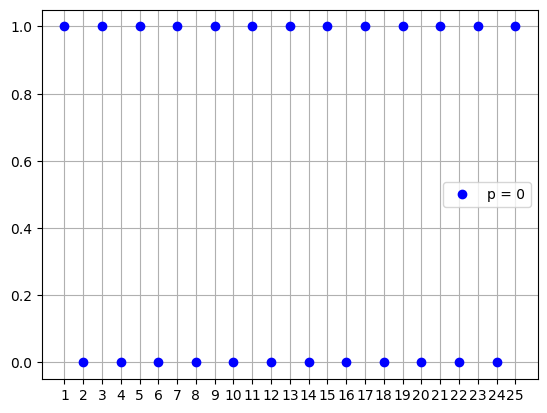

In [156]:
A = 0
B = 1-A
prob = []

a,b = A,B
a, b = (A**2 + B), (A*B)
#prob += [a*A + (1-a)]
for i in range(1,26):
    a,b = A,B
    a, b = (A**2 + B), (A*B)
    for j in range(i):
        a, b = (a*A + b), a*B
    prob += [A*a+(1-a)]

print(prob)
plt.plot([n for n in range(1,26)], prob, 'bo', label = f'p = {A}')
plt.grid()
plt.xticks([n for n in range(1,26)])
plt.legend()
plt.show()
    

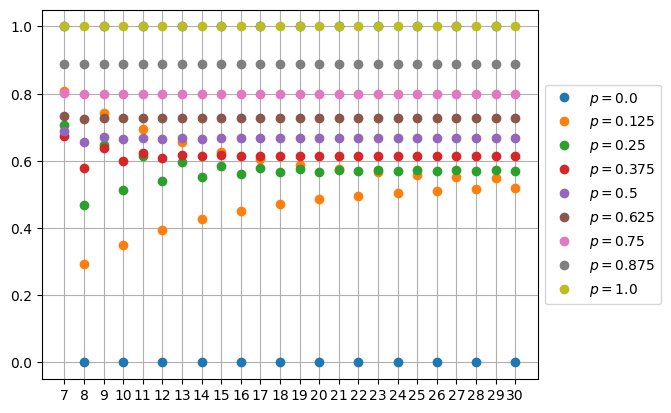

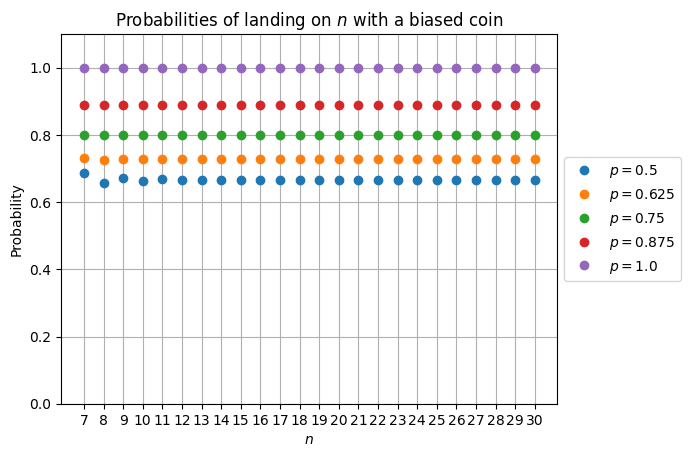

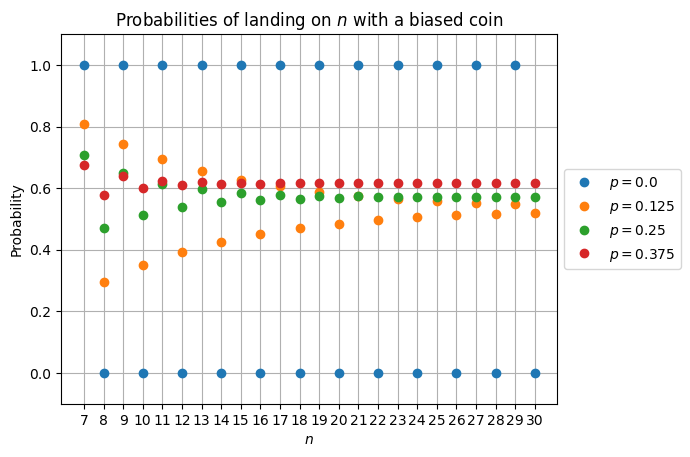

In [176]:
probs = []
vals = 8
for j in range(vals+1):
    A = j/vals
    B = 1-A
    prob = []
    
    a,b = A,B
    a, b = (A**2 + B), (A*B)
    #prob += [a*A + (1-a)]
    for i in range(1,25):
        a,b = A,B
        a, b = (A**2 + B), (A*B)
        for j in range(i):
            a, b = (a*A + b), a*B
        prob += [A*a+(1-a)]
    probs += [prob]

for i in range(vals+1):
    plt.plot([n+5 for n in range(2,26)], probs[i],'o', label = f'$p = {i/vals}$')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([n+5 for n in range(2,26)])
plt.show()

for i in range(round(vals/2), vals+1):
    plt.plot([n+5 for n in range(2,26)], probs[i],'o', label = f'$p = {i/vals}$')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([n+5 for n in range(2,26)])
plt.ylim(0,1.1)
plt.title('Probabilities of landing on $n$ with a biased coin')
plt.xlabel('$n$')
plt.ylabel('Probability')
plt.show()

for i in range(round(vals/2)):
    plt.plot([n+5 for n in range(2,26)], probs[i],'o', label = f'$p = {i/vals}$')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([n+5 for n in range(2,26)])
plt.title('Probabilities of landing on $n$ with a biased coin')
plt.xlabel('$n$')
plt.ylabel('Probability')
plt.ylim(-0.1,1.1)
plt.show()
   


In [219]:
A = 0.25
B = 1-A
a, b = (A**2 + B), (A*B)
print(a,b)
for i in range(21):#21
    a, b = (a*A + b), a*B
    print(f'The coeffients and their sum is (a,b,a+b) = {a,b, a+b}')
print(f'The coefficients are (a,b) = {a,b}')
print(f'The probability of landing on 25 is {a*A + b}')

0.8125 0.1875
The coeffients and their sum is (a,b,a+b) = (0.390625, 0.609375, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.70703125, 0.29296875, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.4697265625, 0.5302734375, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.647705078125, 0.352294921875, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.51422119140625, 0.48577880859375, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.6143341064453125, 0.3856658935546875, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.5392494201660156, 0.4607505798339844, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.5955629348754883, 0.4044370651245117, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.5533277988433838, 0.4466722011566162, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.5850041508674622, 0.41499584913253784, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.5612468868494034, 0.4387531131505966, 1.0)
The coeffients and their sum is (a,b,a+b) = (0.57906483